<a href="https://colab.research.google.com/github/sameersat96/Play-store-data-analysis/blob/main/first_step_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns              # for making plots with seaborn
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path  = "/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/"
 
play_store_df = pd.read_csv(path + "Copy of Play Store Data.csv")
user_review_df = pd.read_csv(path + "Copy of User Reviews.csv")

In [4]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
print(play_store_df.shape)
print(user_review_df.shape)

(10841, 13)
(64295, 5)


#**DATA CLEANING**

In [7]:
# First we need to find missing value in our data
print( ' ' ' missing value is as following' + '\n\n' + ' ' '*'*20)

play_store_df.isnull().sum()


  missing value is as following

 * * * * * * * * * * * * * * * * * * * *


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Data can contain duplicate,NaN type,wrong data type so that we need to clean our data

In [8]:
#checking for duplicates
play_store_df[play_store_df.duplicated(subset=['App'], keep='first')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


Above output retrive 1181 duplicates data so need to drop this data

In [9]:
#delete duplicates from App column.
play_store_df.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True)


check data remove or not

In [10]:
play_store_df[play_store_df.duplicated(subset=['App'], keep='first')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [12]:
play_store_df.isnull().sum()


App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Here you can see that Rating seem to have a very high number of missing observations. The current ver, Android ver and content rating also have missing values, as you can see, but they’re pretty negligible compared to Rating.

Replace all null value with their appropriate values use **aggregate function** such as **mean,mode,median**

In [13]:
# Replacing the null values with the median in the rating column.

median_val =round(play_store_df['Rating'].median(),2)
#median_val
play_store_df['Rating'].fillna(median_val,inplace=True)


In [14]:
play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0],inplace=True)
play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0],inplace=True)
play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0],inplace = True)

In [15]:
# Finding the mod values of column and replacing it null values.

mode_val_type = play_store_df['Type'].mode()[0]
mode_val_type

'Free'

In [16]:
play_store_df['Type'].fillna(mode_val_type,inplace=True)


In [17]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Checking outliers**



*   on playstore rating done between 1 to 5 so we need to drop any rating other than this




In [18]:
play_store_df[play_store_df.Rating<1]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [20]:
play_store_df.drop([9300],inplace=True)

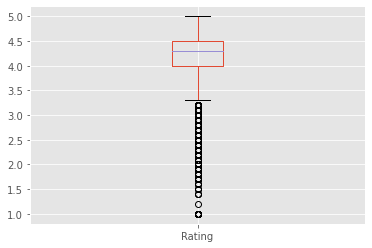

In [21]:
play_store_df.boxplot()

it shows there is no rating present below 1 and above 5


play store review should not more than installs so we need to check data for same

In [22]:
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9657,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [23]:
# removing fake data firstly store in temporary variable
temp_= play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']].index
play_store_df.drop(labels=temp_,inplace=True)

In [24]:
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
play_store_df.isnull().sum()    # missing value procedure done

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

clean data more precisely each column wise

In [26]:
# We need to clean data 
# remove '+' and ',' in Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)  #drop  Free from Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: int(x)) # convert to int

# Remove '$' from Price column and change to float type
play_store_df['Price']=play_store_df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
play_store_df['Price']=play_store_df['Price'].apply(lambda x: float(x))

play_store_df = play_store_df[~(play_store_df['Price'] == "Everyone")].reset_index(drop=True)  #drop 'Everyone from Price column


In [27]:
play_store_df = play_store_df[~(play_store_df['Size'] == "Varies with device")].reset_index(drop=True)  #drop Varies with device from Price column


In [28]:
play_store_df['Size']=play_store_df['Size'].apply(lambda x: str(x).replace('M','').replace('+','').replace(',','') if 'M' in str(x) else x)

# need to convert kb to Mb formula Mb=kb/1024

play_store_df['Size']=play_store_df['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)



### change datatype with respect to their data
play_store_df['Size']=play_store_df['Size'].astype(float)
play_store_df['Reviews']=play_store_df['Reviews'].astype(int)


change datatype of last updated to datetime

In [29]:
play_store_df['Last Updated'] = pd.to_datetime(play_store_df['Last Updated'])
#play_store_df['Last Updated']

#**Correct Data Type**

In [30]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             2450 non-null   object        
 1   Category        2450 non-null   object        
 2   Rating          2450 non-null   float64       
 3   Reviews         2450 non-null   int64         
 4   Size            2450 non-null   float64       
 5   Installs        2450 non-null   int64         
 6   Type            2450 non-null   object        
 7   Price           2450 non-null   float64       
 8   Content Rating  2450 non-null   object        
 9   Genres          2450 non-null   object        
 10  Last Updated    2450 non-null   datetime64[ns]
 11  Current Ver     2450 non-null   object        
 12  Android Ver     2450 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 249.0+ KB


#**Basic observation**

**Average App Rating**

In [31]:
play_store_df['Rating'].mean()

4.19779591836731

**Find top five category getting Higest average Rating**

In [32]:
play_store_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
PARENTING          4.560000
ART_AND_DESIGN     4.507143
EVENTS             4.366667
PERSONALIZATION    4.338614
FOOD_AND_DRINK     4.335714
Name: Rating, dtype: float64

**Find app with 5 star rating**

In [33]:
play_store_df[play_store_df['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
103,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.00,Teen,Dating,2018-07-14,4.0,4.0.3 and up
155,SUMMER SONIC app,EVENTS,5.0,4,61.0,500,Free,0.00,Everyone,Events,2018-07-24,1.0,4.4 and up
157,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21.0,100,Free,0.00,Everyone,Events,2018-07-03,1.0.5,4.4 and up
330,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,2.99,Everyone,Medical,2015-12-16,1.0,4.0 and up
370,Labs on Demand,MEDICAL,5.0,1,22.0,10,Free,0.00,Everyone,Medical,2018-08-03,1.2,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,Santa Fe Thrive,HEALTH_AND_FITNESS,5.0,2,8.3,50,Free,0.00,Everyone,Health & Fitness,2018-07-09,4.2.2,4.1 and up
2336,FK CLASSIC FOR YOU,BUSINESS,5.0,1,3.5,10,Free,0.00,Everyone,Business,2018-02-20,1.1.0,4.0 and up
2376,"Trinity Church Deltona, FL",LIFESTYLE,5.0,33,28.0,500,Free,0.00,Everyone,Lifestyle,2018-05-07,1.9.0.0,2.3.3 and up
2390,FN,BUSINESS,5.0,14,3.3,50,Free,0.00,Everyone,Business,2018-02-01,1.0,4.0 and up


**Total number of free and paid apps**

In [34]:
play_store_df['Type'].value_counts()

Free    2220
Paid     230
Name: Type, dtype: int64

**find app which has maximum reviews**

In [35]:
app_name=play_store_df[play_store_df['Reviews'].max()==play_store_df['Reviews']]['App'].index

play_store_df['App'][app_name]

243    Candy Crush Saga
Name: App, dtype: object

**Display top 5 Apps having highest reviews**

In [36]:
index1=play_store_df['Reviews'].sort_values(ascending=False).head().index

play_store_df.iloc[index1]['App']

243                               Candy Crush Saga
57     UC Browser - Fast Download Private & Secure
245                                            Pou
596                    Gangstar Vegas - mafia game
53                   imo free video calls and chat
Name: App, dtype: object

**Display top 5 app having maximum Installs**

In [37]:
install=play_store_df['Installs'].sort_values(ascending=False).head().index
play_store_df.iloc[install]['App']

245                                            Pou
924                                 Samsung Health
57     UC Browser - Fast Download Private & Secure
243                               Candy Crush Saga
507                                        Dropbox
Name: App, dtype: object

#**DATA VISUALIZATION**

In [38]:
grp=play_store_df.groupby('Category')
x=grp['Installs'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.022150e+06
AUTO_AND_VEHICLES      3.407910e+05
BEAUTY                 5.468393e+05
BOOKS_AND_REFERENCE    8.650937e+04
BUSINESS               4.969710e+05
COMICS                 1.665050e+05
COMMUNICATION          1.402430e+07
DATING                 3.674067e+05
EDUCATION              1.589474e+06
ENTERTAINMENT          8.881250e+06
EVENTS                 2.870245e+05
FAMILY                 2.088615e+06
FINANCE                5.370616e+05
FOOD_AND_DRINK         8.127300e+05
GAME                   1.370227e+07
HEALTH_AND_FITNESS     6.907083e+06
HOUSE_AND_HOME         4.563295e+05
LIBRARIES_AND_DEMO     1.282771e+05
LIFESTYLE              5.753118e+05
MAPS_AND_NAVIGATION    3.170282e+06
MEDICAL                9.337955e+04
NEWS_AND_MAGAZINES     4.984100e+05
PARENTING              1.210020e+05
PERSONALIZATION        1.450088e+06
PHOTOGRAPHY            3.952206e+06
PRODUCTIVITY           6.311599e+06
SHOPPING               1.526097e+06
SOCIAL             

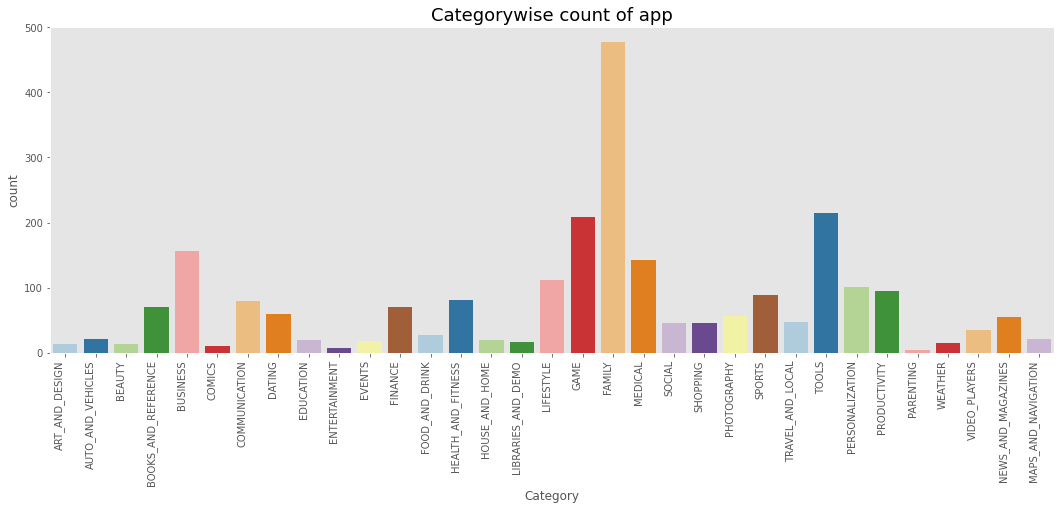

In [39]:
plt.figure(figsize=(18,6))

ax = sns.countplot(x="Category",data=play_store_df,palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax 
plt.title('Categorywise count of app',size = 18)
ax.grid(False)
sns.set_style('white')




*   Game and family subsequently catch high number of market place.
*   Tools,medical and lifestyle aslo catch market prevelance



**Rating of apps**

average rating for app is 4.1978


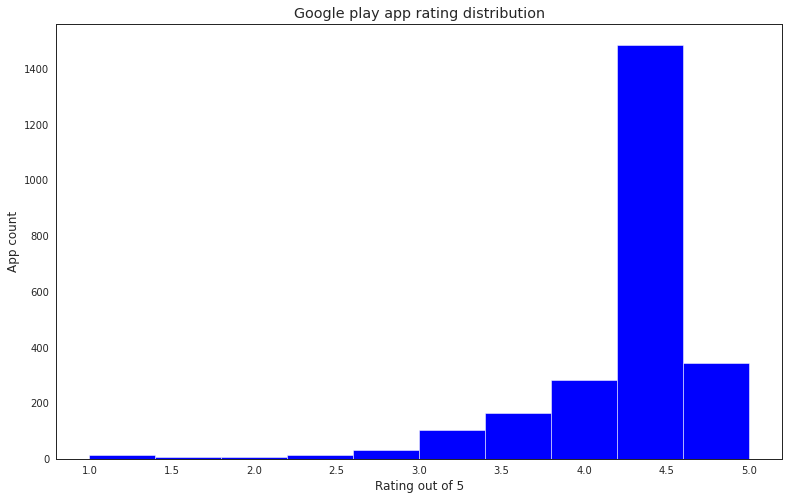

In [40]:
#plot histogram from rating column
plt.figure(figsize=(13,8))
print(f"average rating for app is {round(play_store_df['Rating'].mean(),5)}")

play_store_df['Rating'].hist(color='b')
plt.title('Google play app rating distribution')
plt.ylabel('App count')
plt.xlabel('Rating out of 5')
plt.grid(False)
plt.show()

This histogram shows max rating is between 4.1 above

**App size light or bulky?**

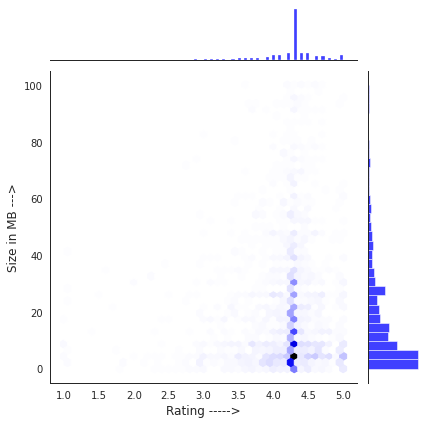

In [41]:

# draw jointplot with
# hex kind
sns.jointplot(x = "Rating", y = "Size",
              kind = "hex",color='b', data = play_store_df)
plt.ylabel('Size in MB --->')
plt.xlabel('Rating ----->')
# Show the plot
plt.show()

 

*   From above join plot we can colculde that most of good rating app i.e between 4-4.5 is having size 0.1-20MB.

*   generally we see high rating means high size apps that not always true.



**Price category**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ce75a4550>],
      dtype=object)

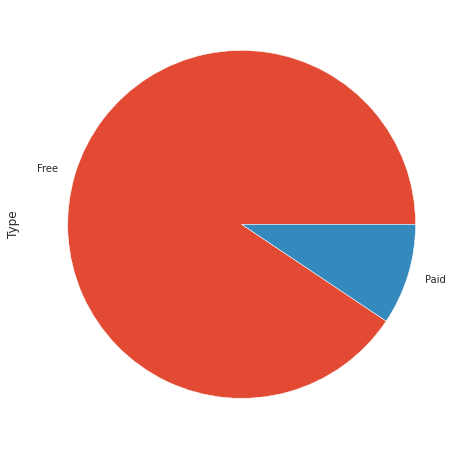

In [42]:
play_store_df['Type'].value_counts().plot.pie(figsize=(12,8),subplots=True)


In [43]:
play_store_df['Type'].value_counts()

Free    2220
Paid     230
Name: Type, dtype: int64

In [44]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             2450 non-null   object        
 1   Category        2450 non-null   object        
 2   Rating          2450 non-null   float64       
 3   Reviews         2450 non-null   int64         
 4   Size            2450 non-null   float64       
 5   Installs        2450 non-null   int64         
 6   Type            2450 non-null   object        
 7   Price           2450 non-null   float64       
 8   Content Rating  2450 non-null   object        
 9   Genres          2450 non-null   object        
 10  Last Updated    2450 non-null   datetime64[ns]
 11  Current Ver     2450 non-null   object        
 12  Android Ver     2450 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 249.0+ KB


In [45]:
play_store_df.drop(play_store_df[play_store_df['Content Rating']=='Unrated'].index,inplace=True)
play_store_df.drop(play_store_df[play_store_df['Content Rating']=='Adults only 18+'].index,inplace=True)

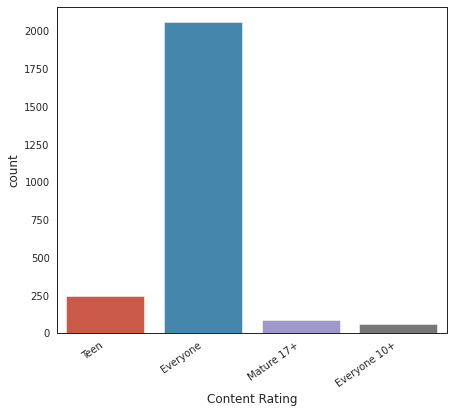

In [46]:
plt.figure(figsize=(7,6))
plt.xticks(rotation = 35, ha = 'right')
ax = sns.countplot(x='Content Rating',data=play_store_df)

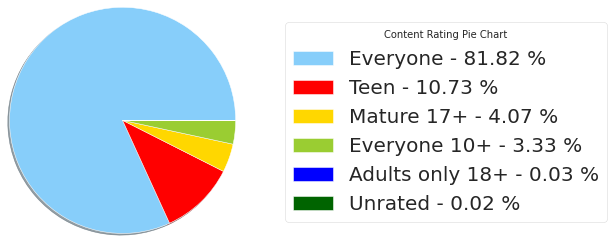

In [47]:
# We Plot the pie chart for Content rating & showing their percentages 
import matplotlib.pyplot as plt
import numpy as np

x = np.char.array(['Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated'])
y = np.array([7903, 1036,393,322, 3, 2])
colors = ['lightskyblue', 'red', 'gold','yellowgreen' ,'blue', 'darkgreen']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors,shadow=True, startangle=360, radius=1.3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,title='Content Rating Pie Chart', loc='right center', bbox_to_anchor=(1.2, 1.),
           fontsize=20)
plt.savefig('piechart.png', bbox_inches='tight')

**corr for pairwise correlation**

In [48]:
corr=play_store_df.corr()
corr

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050984,0.049207,0.032285,-0.002024
Reviews,0.050984,1.000000,0.153423,0.755063,-0.009168
Size,0.049207,0.153423,1.000000,0.132626,-0.026918
Installs,0.032285,0.755063,0.132626,1.000000,-0.010051
Price,-0.002024,-0.009168,-0.026918,-0.010051,1.000000


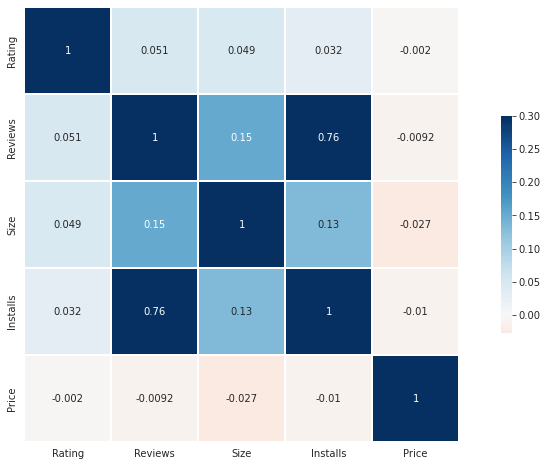

In [49]:
#plot heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,  vmax=.3, center=0, cmap="RdBu",annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.gcf().set_size_inches(15, 8)


A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

This shows that many active users who download an app usually also leave back a review or feedback.

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

Analysis of sentiment

In [50]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [51]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [52]:
sentiment_df=pd.merge(user_review_df,play_store_df[['App','Type','Price']],how='inner',on='App')

#After this drop null value
sentiment_df = sentiment_df.dropna()
sentiment_df.shape


(4880, 7)

In [53]:
# A dataframe for each app type
free_apps = sentiment_df[sentiment_df["Type"] == "Free"]
paid_apps = sentiment_df[sentiment_df["Type"] == "Paid"]

In [54]:
# Return normalized values (percentages).
print("Free Apps - Sentiment Percentage \n" + "-"*30 + "\n{}\n\n".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("Paid Apps - Sentiment Percentage \n" + "-"*30 +"\n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free Apps - Sentiment Percentage 
------------------------------
Positive    65.571672
Negative    20.221843
Neutral     14.206485
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
------------------------------
Positive    81.250000
Negative    13.020833
Neutral      5.729167
Name: Sentiment, dtype: float64


In [55]:
# Reset index, then drop the old index column when it is moved to the right as a new column
paid_apps = paid_apps.reset_index().drop(columns=["index"])
free_apps = free_apps.reset_index().drop(columns=["index"])

# Generate a list of random indexes applicable to free_apps
random_indexes = np.random.choice(len(free_apps)-1, len(paid_apps), replace=False)

# Shorten free_apps to the same size of paid_apps & using a random selection
free_apps = free_apps.iloc[random_indexes]

# Reset index of free_apps
free_apps = free_apps.reset_index().drop(columns=["index"])

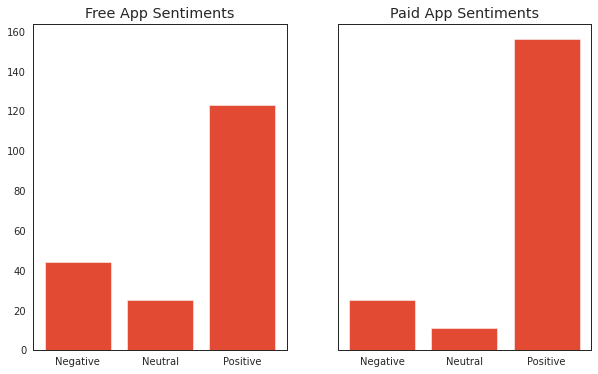

In [56]:
# Generate values & counts for Sentiment columns in our dataframes & put them in dictionaries
val_ct_free = np.unique(free_apps['Sentiment'],return_counts=True)
free_data = {value: count for value, count in zip(val_ct_free[0],val_ct_free[1])}

val_ct_paid = np.unique(paid_apps['Sentiment'],return_counts=True)
paid_data = {value: count for value, count in zip(val_ct_paid[0],val_ct_paid[1])}


# Put values and counts each in a different variable for use in plots, taken from dictionaries
free_names = list(free_data.keys())
free_values = list(free_data.values())
paid_names = list(paid_data.keys())
paid_values = list(paid_data.values())


# Create a figure containing plots for each app type, sharing the y-axis for comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharey=True)
axs[0].bar(free_names, free_values)
axs[0].set_title("Free App Sentiments")
axs[1].bar(paid_names, paid_values)
axs[1].set_title("Paid App Sentiments")
plt.show()

#**sentiment analysis based on category**

In [57]:
# First we merge the Category & App of 1st data set to App column in 2nd data set
category_df = pd.merge(sentiment_df, play_store_df[["App","Category"]] , how='inner', on="App")

# Drop all nan values
category_df =category_df.dropna()

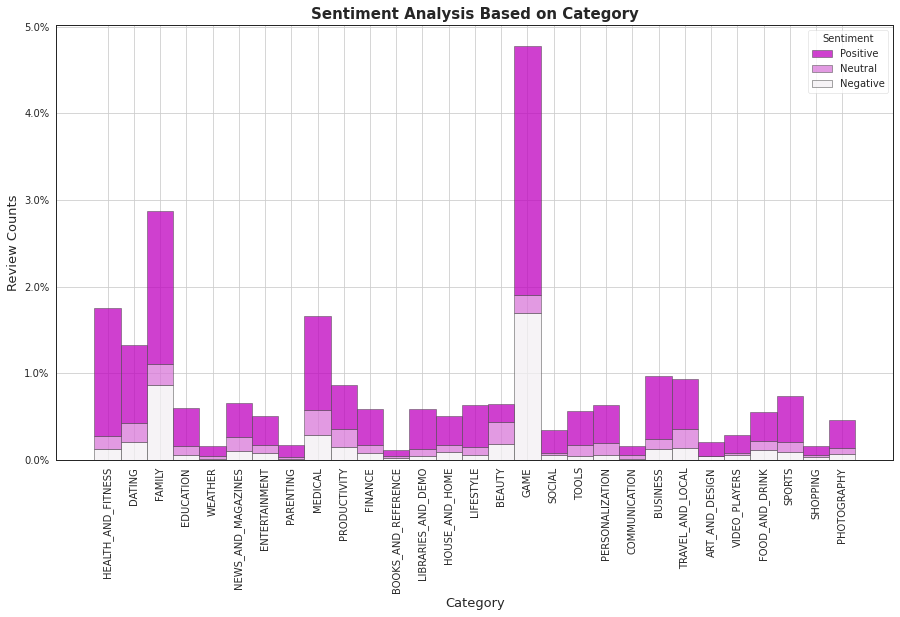

In [58]:
from matplotlib.ticker import PercentFormatter

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)

sns.histplot(
    category_df,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=13)
ax.set_ylabel("Review Counts",fontsize=13)
plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

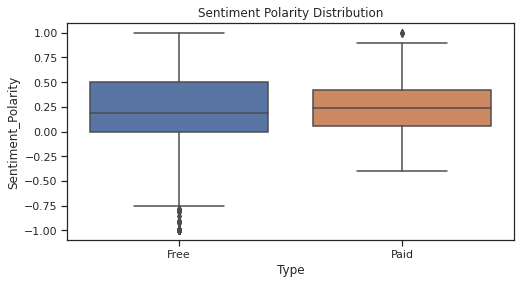

In [59]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = sentiment_df)
ax.set_title('Sentiment Polarity Distribution')

#**WORDCLOUD -quick overlook**

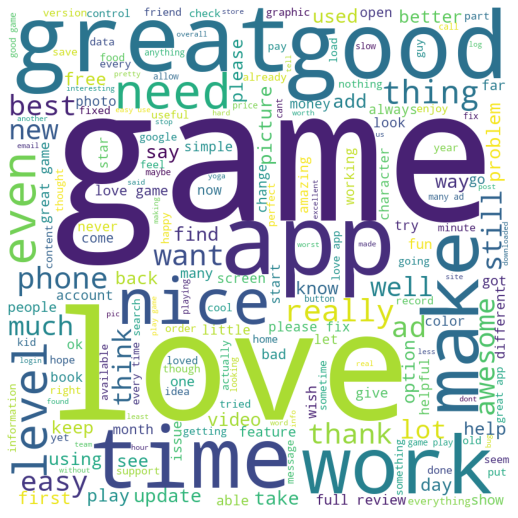

In [60]:
from wordcloud import WordCloud, STOPWORDS

free_apps = sentiment_df[sentiment_df["Type"] == "Free"]


comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in free_apps.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)




# plot the WordCloud image                       
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()                    

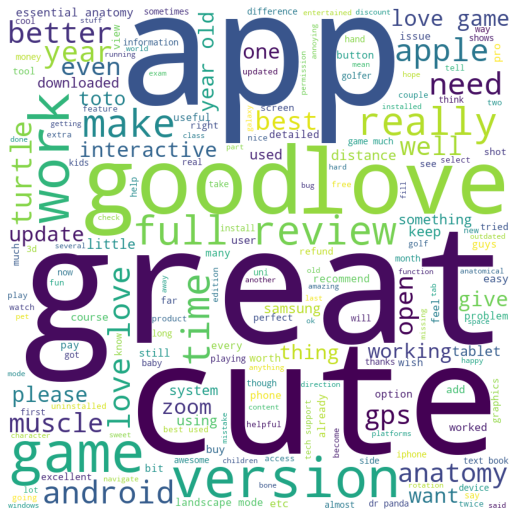

In [61]:
paid_apps = sentiment_df[sentiment_df["Type"] == "Paid"]


comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in paid_apps.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

                
  
# plot the WordCloud image                       
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Sentiment Polarity

The polarity of a sentiment measures how negative or positive the context is.

-In the data that we have, the polarity ranges from -1 (most negative) to +1 (most positive).

Let's find out by plotting polarity for both free & paid app types:

[ ]


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

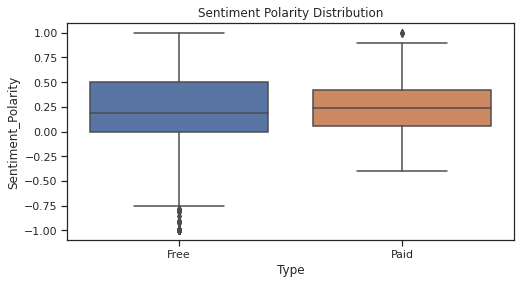

In [62]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = sentiment_df)
ax.set_title('Sentiment Polarity Distribution')

In [63]:
paid_apps=sentiment_df[sentiment_df['Type']=='Paid']
 
free_apps=sentiment_df[sentiment_df['Type']=='Free']
 

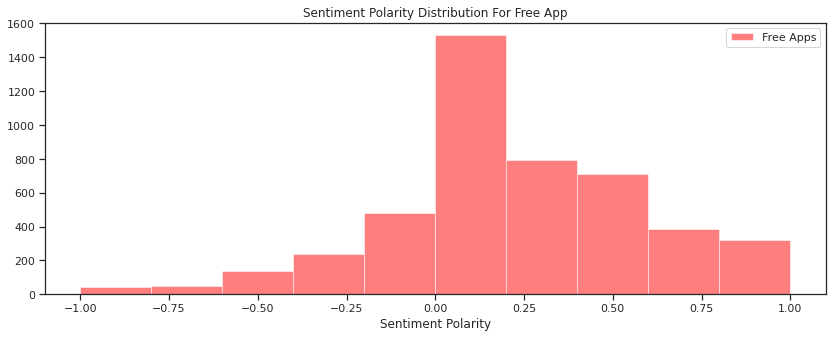

In [64]:
polarity_free = free_apps["Sentiment_Polarity"]

# Plot two histograms showing sentiment polarity of each app type
plt.figure(figsize=(14,5))
plt.hist(polarity_free, color="red",alpha=.5, label="Free Apps")

plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

When we look at this graph, we find that there is more neutral polarity in free apps, as shown by the larger red region just above the 0.00 on the x axis.

As we can se there is a more extreme positive polarity for free apps, as seen on the x axis in the range of 0.5 to 1.00.

While some sentiments are exceptionally positive, none fall below -0.5, suggest greater overall satisfaction with paid apps and demonstrating a minimum cap for negative sentiments.

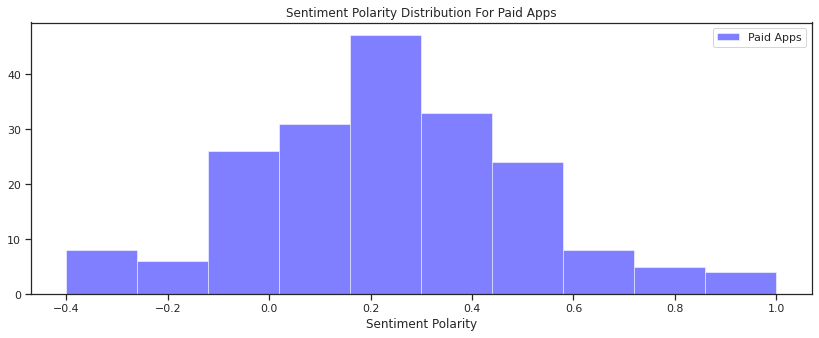

In [66]:
polarity_paid = paid_apps['Sentiment_Polarity']

# Plot two histograms showing sentiment polarity of each app type
plt.figure(figsize=(14,5))
plt.hist(polarity_paid, color="blue",alpha=.5, label="Paid Apps")

plt.title('Sentiment Polarity Distribution For Paid Apps')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

For Paid apps, the majority of opinions fall somewhere between 0 and 0.5.

While some sentiments are exceptionally positive, none fall below -0.5, suggesting greater overall satisfaction with paid apps and demonstrating a minimum cap for negative sentiments.